<a href="https://colab.research.google.com/github/laxman-016/Baby-cry-Analyzer/blob/master/Email_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

#update scikit learn for some features like roc_auc_ovr
# !pip install --upgrade scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1  = '/content/drive/MyDrive/email (1)/email_opened_table.csv'
email_opened_df = pd.read_csv(path1)

In [4]:
email_opened_df.head()
email_opened_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB


In [5]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {email_opened_df.duplicated().value_counts()}, unique values with {len(email_opened_df[email_opened_df.duplicated()])} duplication")

Data is duplicated ? False    10345
Name: count, dtype: int64, unique values with 0 duplication


In [6]:
path  = '/content/drive/MyDrive/email (1)/email_table.csv'
email_df = pd.read_csv(path)

In [7]:
email_df.head()
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [8]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {email_df.duplicated().value_counts()}, unique values with {len(email_df[email_df.duplicated()])} duplication")

Data is duplicated ? False    100000
Name: count, dtype: int64, unique values with 0 duplication


In [9]:
# Missing Values/Null Values Count
email_df.isnull().sum()

,0
email_id,0
email_text,0
email_version,0
hour,0
weekday,0
user_country,0
user_past_purchases,0


In [10]:
# Check Unique Values for each variable.
for i in email_df.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, email_df[i].nunique()))

No. of unique values in 'email_id' is 100000.
No. of unique values in 'email_text' is 2.
No. of unique values in 'email_version' is 2.
No. of unique values in 'hour' is 24.
No. of unique values in 'weekday' is 7.
No. of unique values in 'user_country' is 4.
No. of unique values in 'user_past_purchases' is 23.


In [11]:
path2  = '/content/drive/MyDrive/email (1)/link_clicked_table.csv'
link_clicked_df = pd.read_csv(path2)

In [12]:
link_clicked_df.head()
link_clicked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  2119 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


In [13]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {link_clicked_df.duplicated().value_counts()}, unique values with {len(link_clicked_df[link_clicked_df.duplicated()])} duplication")

Data is duplicated ? False    2119
Name: count, dtype: int64, unique values with 0 duplication


In [14]:
email_df["email_opened"] = email_df["email_id"].isin(email_opened_df["email_id"]).astype(int)

# Add 'link_clicked' column: 1 if email_id is in link_clicked_df, else 0
email_df["link_clicked"] = email_df["email_id"].isin(link_clicked_df["email_id"]).astype(int)

# Check the combined dataframe
email_df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [15]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   email_opened         100000 non-null  int64 
 8   link_clicked         100000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.9+ MB


In [16]:
# Counts
total_emails = len(email_df)
opened_count = email_df['email_opened'].sum()
clicked_count = email_df['link_clicked'].sum()

# Metrics
open_rate = opened_count / total_emails * 100
click_rate = clicked_count / total_emails * 100
click_rate_opened = (clicked_count / opened_count * 100) if opened_count > 0 else 0

# Output
print("📬 Email Campaign Performance Metrics:")
print(f"Total Emails Sent          : {total_emails}")
print(f"Opened Emails              : {opened_count}")
print(f"Clicked Emails             : {clicked_count}")
print(f"1. Open Rate               : {open_rate:.2f}%")
print(f"2. Click Rate              : {click_rate:.2f}%")
print(f"3. Click Rate (Opened Only): {click_rate_opened:.2f}%")


📬 Email Campaign Performance Metrics:
Total Emails Sent          : 100000
Opened Emails              : 10345
Clicked Emails             : 2119
1. Open Rate               : 10.35%
2. Click Rate              : 2.12%
3. Click Rate (Opened Only): 20.48%


In [17]:
import pandas as pd

# Example dataframe creation (assuming you already have your dataframe 'df')
# df = pd.DataFrame(...)

# Create the 'email_status' column
email_df['email_status'] = 0  # Default to 0 (neither opened nor clicked)

# Update the email_status where email was opened (email_opened = 1) but link was not clicked
email_df.loc[(email_df['email_opened'] == 1) & (email_df['link_clicked'] == 0), 'email_status'] = 1

# Update the email_status where email was opened and link was clicked
email_df.loc[(email_df['email_opened'] == 1) & (email_df['link_clicked'] == 1), 'email_status'] = 2

# Optionally drop the old 'email_opened' and 'link_clicked' columns if no longer needed
email_df.drop(['email_opened', 'link_clicked'], axis=1, inplace=True)


In [18]:

# Print the dataframe info
print(email_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   email_status         100000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.1+ MB
None


In [19]:
# Print unique value counts for each column in email_df
for column in email_df.columns:
    print(f"Unique values in '{column}':")
    print(email_df[column].value_counts())
    print("\n")


Unique values in 'email_id':
email_id
7263      1
173614    1
963733    1
782611    1
600879    1
         ..
106887    1
493711    1
777221    1
966622    1
85120     1
Name: count, Length: 100000, dtype: int64


Unique values in 'email_text':
email_text
long_email     50276
short_email    49724
Name: count, dtype: int64


Unique values in 'email_version':
email_version
generic         50209
personalized    49791
Name: count, dtype: int64


Unique values in 'hour':
hour
9     8529
8     8398
7     8204
10    8180
11    7483
6     7465
5     6551
12    6508
4     5622
13    5581
3     4610
14    4580
2     3676
15    3493
16    2759
1     2703
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: count, dtype: int64


Unique values in 'weekday':
weekday
Saturday     14569
Sunday       14387
Monday       14363
Thursday     14277
Friday       14177
Tuesday      14143
Wednesday    14084
Name: count, dtype: int64


Unique values in 'user_country':
us

In [20]:
# Categorizing hour into time slots
def categorize_time(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'hour' column to create the 'time_slot' column
email_df['time_slot'] = email_df['hour'].apply(categorize_time)

# Print the updated dataframe info
print(email_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   email_status         100000 non-null  int64 
 8   time_slot            100000 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.9+ MB
None


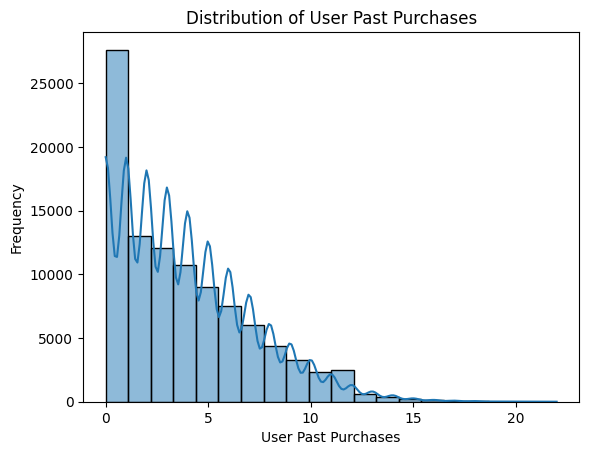

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of user_past_purchases
sns.histplot(email_df['user_past_purchases'], kde=True, bins=20)
plt.title('Distribution of User Past Purchases')
plt.xlabel('User Past Purchases')
plt.ylabel('Frequency')
plt.show()


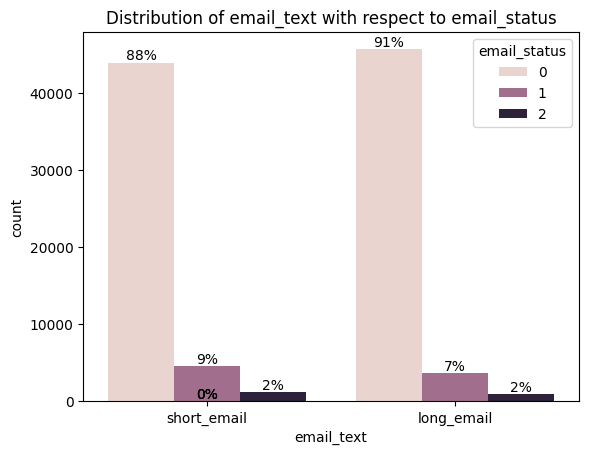

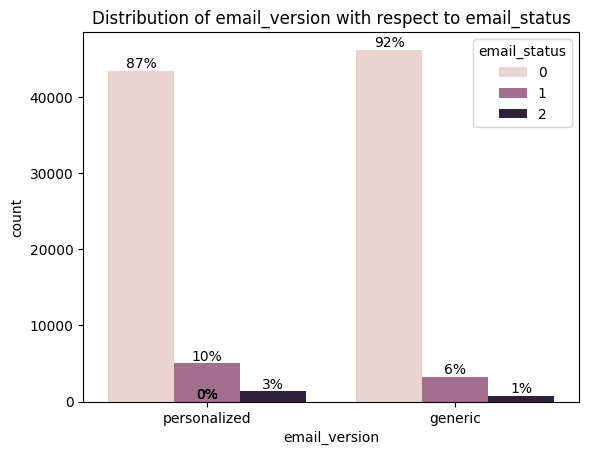

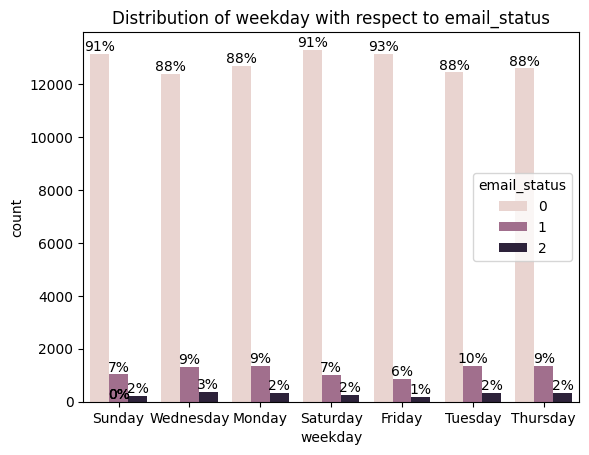

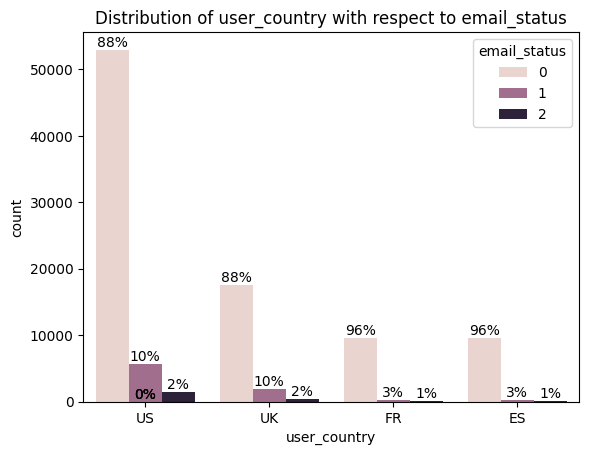

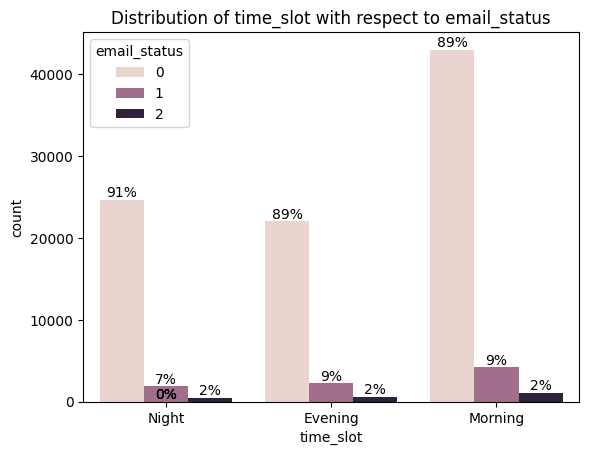

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables in your dataset
categorical_variables = ['email_text', 'email_version', 'weekday', 'user_country', 'time_slot']
Target_var = ['email_status']

# Loop through each categorical variable
for value in categorical_variables:
    ax = sns.countplot(x=email_df[value], hue=email_df[Target_var[0]])

    unique = len([x for x in email_df[value].unique() if x == x])  # Get the unique categories
    bars = ax.patches

    for i in range(unique):
        catbars = bars[i:][::unique]  # Get the bars for each category

        # Get total height (count) of bars in each category
        total = sum([x.get_height() for x in catbars])

        # Display the percentage on top of each bar
        for bar in catbars:
            ax.text(bar.get_x() + bar.get_width() / 2.,
                    bar.get_height(),
                    f'{bar.get_height() / total:.0%}',
                    ha="center", va="bottom")

    # Show the plot
    plt.title(f'Distribution of {value} with respect to {Target_var[0]}')
    plt.show()


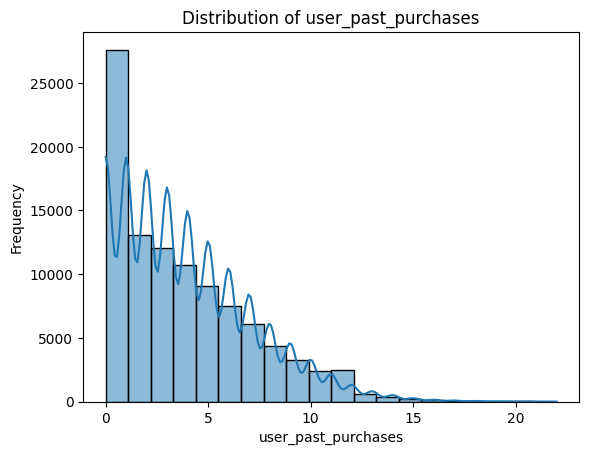

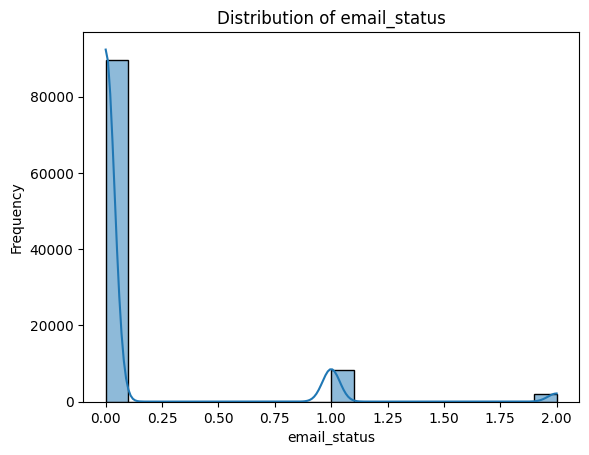

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous variables in your dataset
cont_var = ['user_past_purchases', 'email_status']  # You can include more continuous variables if needed

# Loop through each continuous variable
for value in cont_var:
    sns.histplot(email_df[value], kde=True, bins=20)
    plt.title(f'Distribution of {value}')
    plt.xlabel(value)
    plt.ylabel('Frequency')
    plt.show()


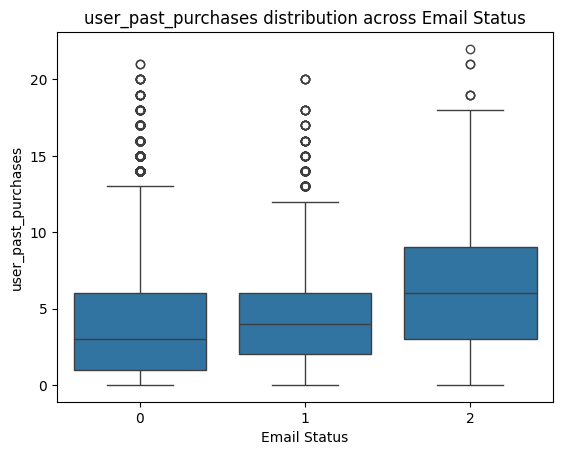

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous variables in your dataset
cont_var = ['user_past_purchases']  # Add any other continuous variables you want to visualize

# Loop through each continuous variable
for value in cont_var:
    sns.boxplot(x=email_df['email_status'], y=email_df[value])
    plt.title(f'{value} distribution across Email Status')
    plt.xlabel('Email Status')
    plt.ylabel(value)
    plt.show()


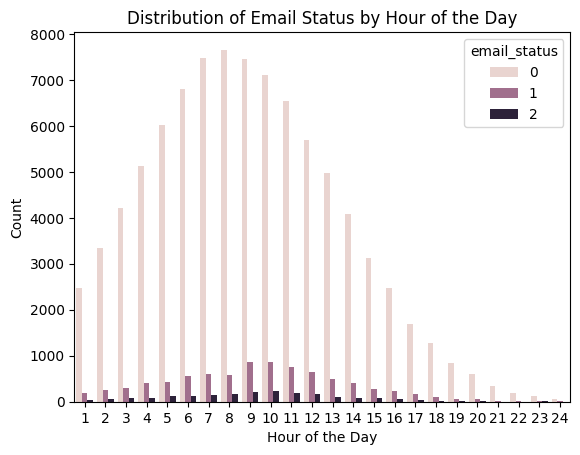

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of the hour column with respect to email_status
sns.countplot(x=email_df['hour'], hue=email_df['email_status'])
plt.title('Distribution of Email Status by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


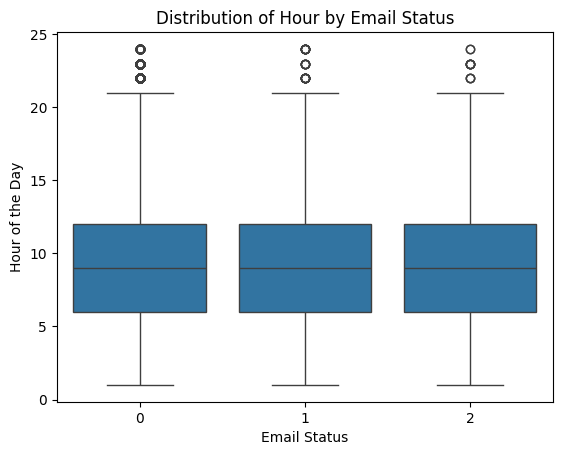

In [26]:
# Boxplot of hour against email_status
sns.boxplot(x=email_df['email_status'], y=email_df['hour'])
plt.title('Distribution of Hour by Email Status')
plt.xlabel('Email Status')
plt.ylabel('Hour of the Day')
plt.show()


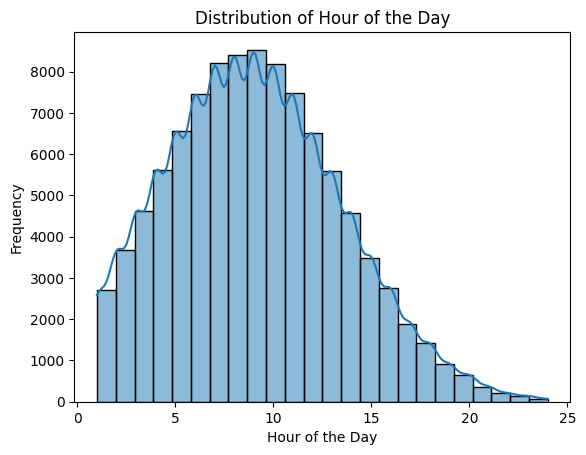

In [27]:
# Histogram of the hour with KDE
sns.histplot(email_df['hour'], kde=True, bins=24)
plt.title('Distribution of Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()


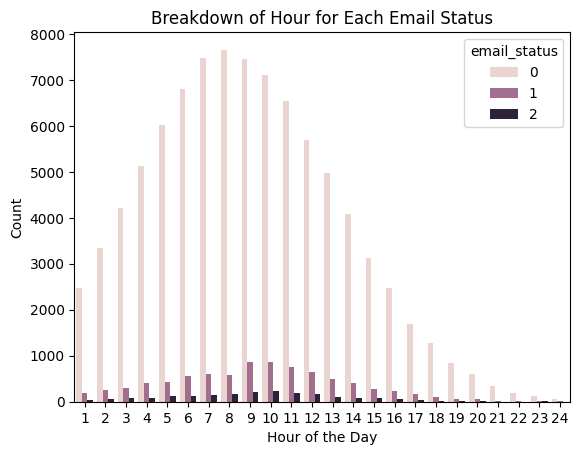

In [28]:
# Count plot of hours based on email status
sns.countplot(x=email_df['hour'], hue=email_df['email_status'])
plt.title('Breakdown of Hour for Each Email Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


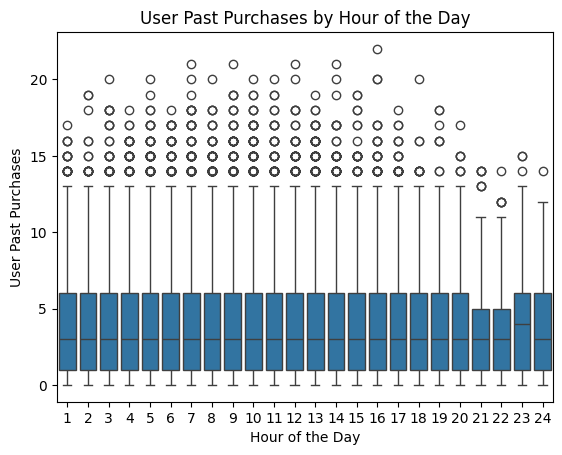

In [29]:


import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to compare the distribution of user_past_purchases by hour
sns.boxplot(x='hour', y='user_past_purchases', data=email_df)
plt.title('User Past Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('User Past Purchases')
plt.show()



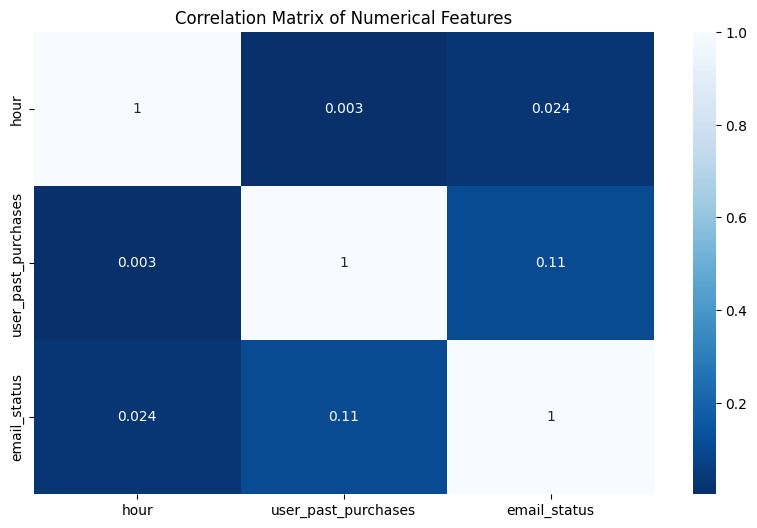

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'email_id' and keep only numeric columns
numeric_df = email_df.drop(columns=['email_id'])
numeric_df = numeric_df.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap='Blues_r', annot=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()



In [31]:
print(email_df.head())



   email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  email_status time_slot  
0                    5             0     Night  
1                    2             2   Evening  
2                    2             0   Morning  
3                    1             0   Morning  
4                    6             0   Evening  


In [32]:
# Drop email_id since it's just an identifier
email_df_cleaned = email_df.drop(columns=['email_id'])

# One-hot encode all categorical columns
email_df_encoded = pd.get_dummies(email_df_cleaned, drop_first=True)

# Show the first few rows of the encoded DataFrame
print(email_df_encoded.head())


   hour  user_past_purchases  email_status  email_text_short_email  \
0     2                    5             0                    True   
1    12                    2             2                   False   
2    11                    2             0                   False   
3     6                    1             0                    True   
4    14                    6             0                   False   

   email_version_personalized  weekday_Monday  weekday_Saturday  \
0                        True           False             False   
1                        True           False             False   
2                        True           False             False   
3                       False            True             False   
4                       False            True             False   

   weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
0            True             False            False              False   
1            True         

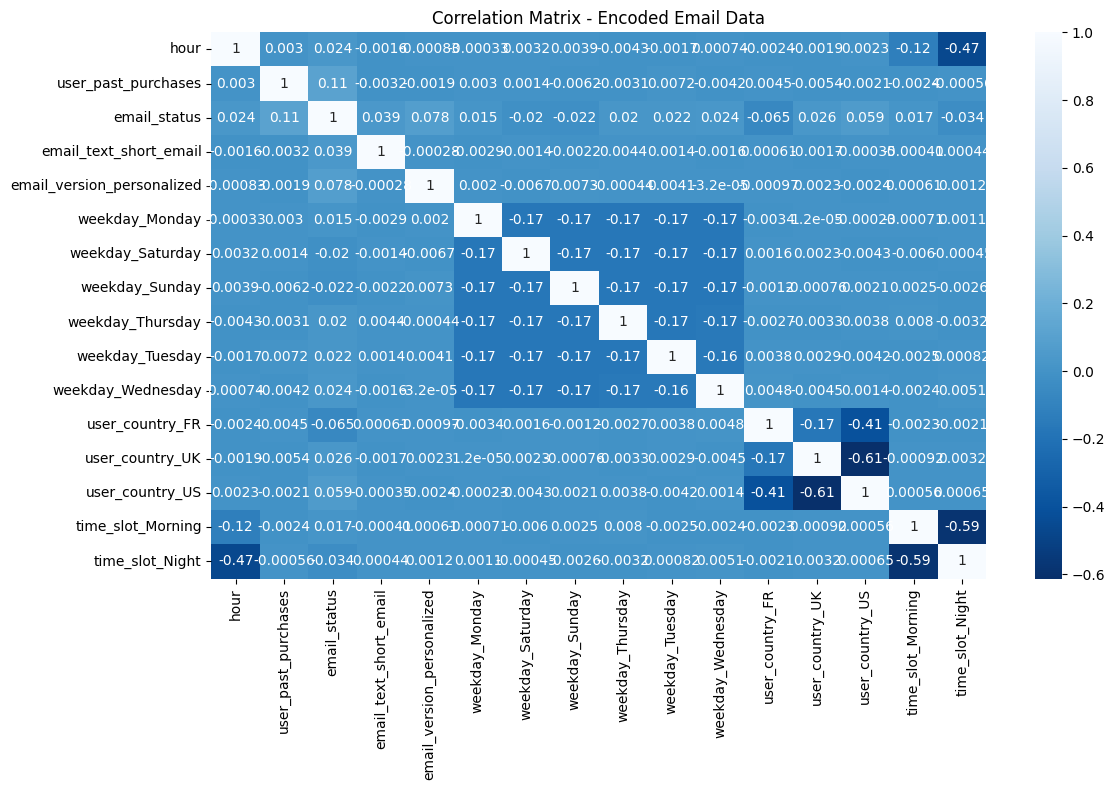

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for the one-hot encoded dataframe
plt.figure(figsize=(12, 8))
sns.heatmap(email_df_encoded.corr(), cmap='Blues_r', annot=True)
plt.title("Correlation Matrix - Encoded Email Data")

# Save the plot as a PNG file to your system
plt.tight_layout()
plt.savefig('correlation_matrix_heatmap.png')  # Save to the current directory

# Show the plot
plt.show()


In [34]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['hour'] + [col for col in email_df_encoded.columns if col.startswith('weekday_')]
email_df_cleaned = email_df_encoded.drop(columns=columns_to_drop)

# Show the first few rows of the cleaned DataFrame
print(email_df_cleaned.head())


   user_past_purchases  email_status  email_text_short_email  \
0                    5             0                    True   
1                    2             2                   False   
2                    2             0                   False   
3                    1             0                    True   
4                    6             0                   False   

   email_version_personalized  user_country_FR  user_country_UK  \
0                        True            False            False   
1                        True            False             True   
2                        True            False            False   
3                       False            False             True   
4                       False            False            False   

   user_country_US  time_slot_Morning  time_slot_Night  
0             True              False             True  
1            False              False            False  
2             True               True    

In [35]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only the numerical features
numerical_features = email_df.select_dtypes(include=['int64', 'float64']).drop(columns=['email_status'])  # Drop target
X = numerical_features

# Add constant column for VIF calculation
X_with_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(len(X.columns))]

print(vif_data)



               feature  VIF
0             email_id 1.00
1                 hour 1.00
2  user_past_purchases 1.00


In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ensure all columns are numeric and drop non-numeric ones
email_df_numeric = email_df_cleaned.select_dtypes(include=['int64', 'float64'])

# Handle missing values (optional, here we drop rows with NaN values)
email_df_numeric = email_df_numeric.dropna()

# Add a constant column to account for the intercept term
X = add_constant(email_df_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


               feature  VIF
0                const 2.51
1  user_past_purchases 1.01
2         email_status 1.01


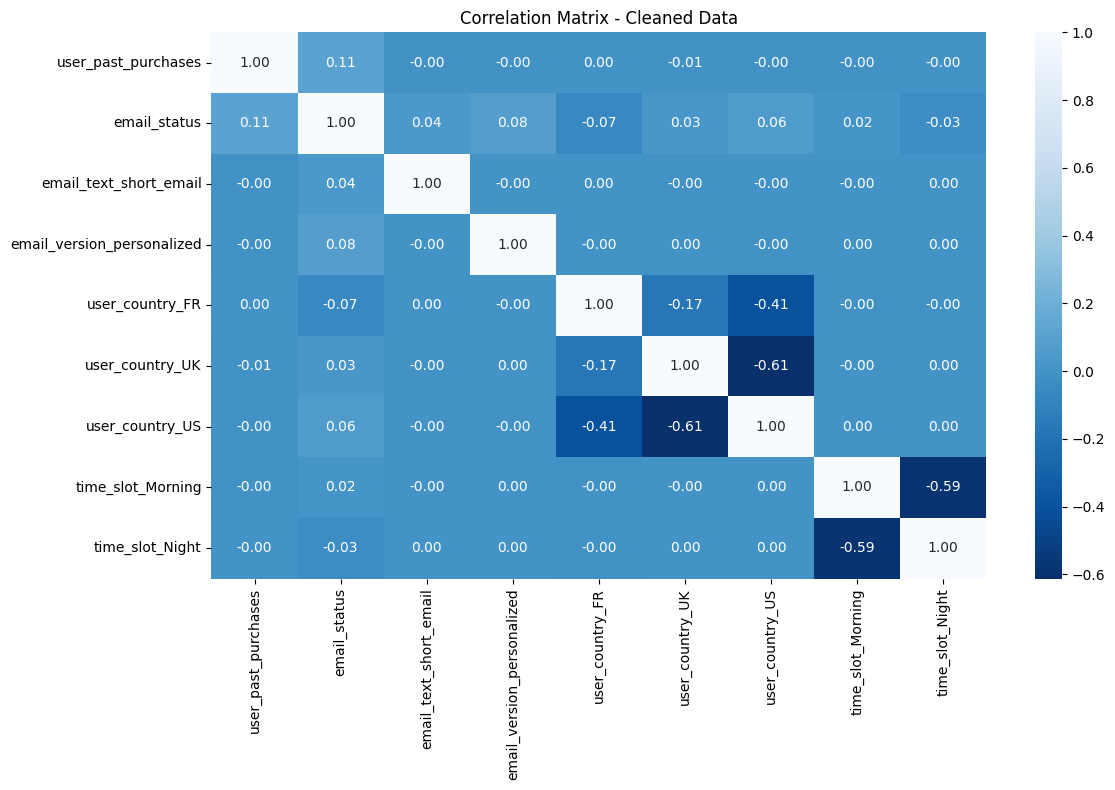

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(email_df_cleaned.corr(), annot=True, cmap='Blues_r', fmt='.2f')
plt.title("Correlation Matrix - Cleaned Data")

# Save the heatmap as an image file (PNG)
plt.tight_layout()
plt.savefig('correlation_matrix_heatmap.png')  # Save to the current directory

# Show the heatmap
plt.show()


In [38]:
# Checking correlation between specific features
corr = email_df_cleaned[['user_past_purchases', 'email_status', 'time_slot_Morning', 'time_slot_Night']].corr()
print(corr)


                     user_past_purchases  email_status  time_slot_Morning  \
user_past_purchases                 1.00          0.11              -0.00   
email_status                        0.11          1.00               0.02   
time_slot_Morning                  -0.00          0.02               1.00   
time_slot_Night                    -0.00         -0.03              -0.59   

                     time_slot_Night  
user_past_purchases            -0.00  
email_status                   -0.03  
time_slot_Morning              -0.59  
time_slot_Night                 1.00  


Correlation Matrix:
                            email_text_short_email  \
email_text_short_email                        1.00   
email_version_personalized                   -0.00   
email_status                                  0.04   

                            email_version_personalized  email_status  
email_text_short_email                           -0.00          0.04  
email_version_personalized                        1.00          0.08  
email_status                                      0.08          1.00  


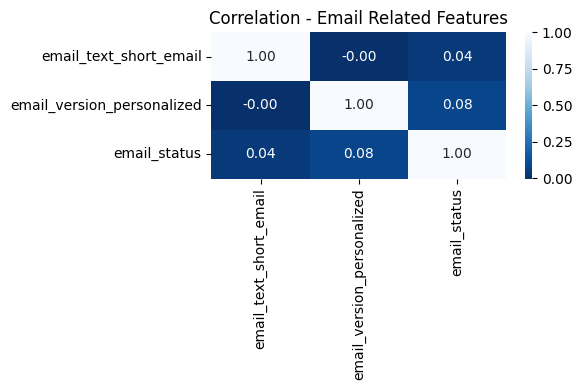


VIF Values:
                      feature  VIF
0                       const 2.98
1      email_text_short_email 1.00
2  email_version_personalized 1.00


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Convert boolean to int (if not already)
email_df_cleaned['email_text_short_email'] = email_df_cleaned['email_text_short_email'].astype(int)
email_df_cleaned['email_version_personalized'] = email_df_cleaned['email_version_personalized'].astype(int)

# Step 1: Correlation matrix for email features
corr_email_features = email_df_cleaned[['email_text_short_email', 'email_version_personalized', 'email_status']].corr()
print("Correlation Matrix:")
print(corr_email_features)

# Optional: visualize the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(corr_email_features, annot=True, cmap='Blues_r', fmt='.2f')
plt.title("Correlation - Email Related Features")
plt.tight_layout()
plt.show()

# Step 2: Check VIF (Multicollinearity)
X_email = email_df_cleaned[['email_text_short_email', 'email_version_personalized']]
X_email = sm.add_constant(X_email)

vif_data_email = pd.DataFrame()
vif_data_email['feature'] = X_email.columns
vif_data_email['VIF'] = [variance_inflation_factor(X_email.values, i) for i in range(X_email.shape[1])]

print("\nVIF Values:")
print(vif_data_email)


In [40]:
# Grouping by country and averaging email_status
email_df_cleaned.groupby(['user_country_US', 'user_country_UK', 'user_country_FR'])['email_status'].mean()


user_country_US  user_country_UK  user_country_FR
False            False            False             0.05
                                  True              0.05
                 True             False             0.14
True             False            False             0.14
Name: email_status, dtype: float64

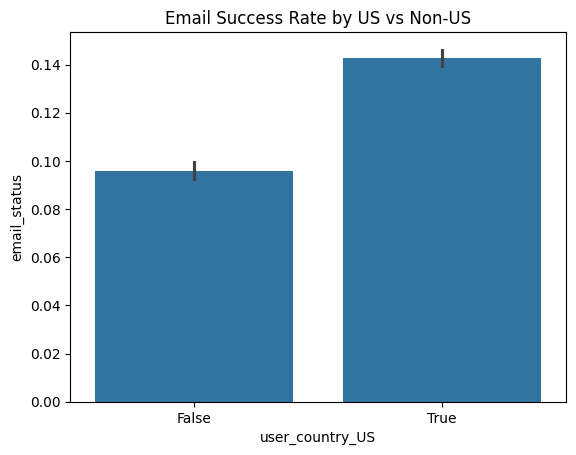

In [41]:
import seaborn as sns
sns.barplot(data=email_df_cleaned, x='user_country_US', y='email_status')
plt.title("Email Success Rate by US vs Non-US")
plt.show()


In [42]:
# List of columns we might want to drop
possible_drop_cols = [
    'email_id', 'hour',
    'user_country_UK',
    'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
    'weekday_Thursday', 'weekday_Saturday', 'weekday_Sunday'
]

# Drop only the columns that still exist in the dataframe
columns_to_drop = [col for col in possible_drop_cols if col in email_df_cleaned.columns]
email_df_final = email_df_cleaned.drop(columns=columns_to_drop)

# Optional: print to confirm
print("Dropped columns:", columns_to_drop)
print("Remaining columns:", email_df_final.columns.tolist())


Dropped columns: ['user_country_UK']
Remaining columns: ['user_past_purchases', 'email_status', 'email_text_short_email', 'email_version_personalized', 'user_country_FR', 'user_country_US', 'time_slot_Morning', 'time_slot_Night']


In [43]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = email_df_final.drop('email_status', axis=1)
y = email_df_final['email_status']

# Print shapes
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Train-Test Split with stratification to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Confirm the split
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Shape of X: (100000, 7)
Shape of y: (100000,)
Training set size: 80000
Test set size: 20000


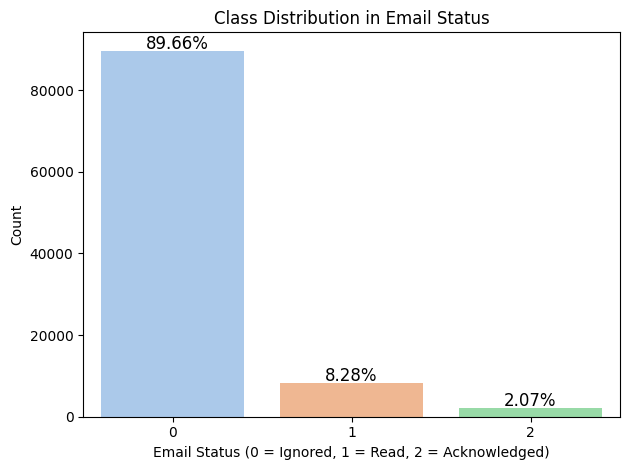

Class distribution:
email_status
0    89655
1     8276
2     2069
Name: count, dtype: int64


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for email_status
ax = sns.countplot(x=email_df_final['email_status'], palette='pastel')

# Adding percentage labels above bars
totals = []
for p in ax.patches:
    totals.append(p.get_height())

total = sum(totals)

for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + 0.25, p.get_height() + 500, f'{percentage:.2f}%', fontsize=12)

plt.title("Class Distribution in Email Status")
plt.xlabel("Email Status (0 = Ignored, 1 = Read, 2 = Acknowledged)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Value counts
print("Class distribution:")
print(email_df_final['email_status'].value_counts())


Original dataset shape: 80000
Resampled dataset shape (Random UnderSampling): 4965
Resampled dataset shape (SMOTE): 215172

Random UnderSampling Class Distribution:
Class=0, n=1655 (33.333%)
Class=1, n=1655 (33.333%)
Class=2, n=1655 (33.333%)


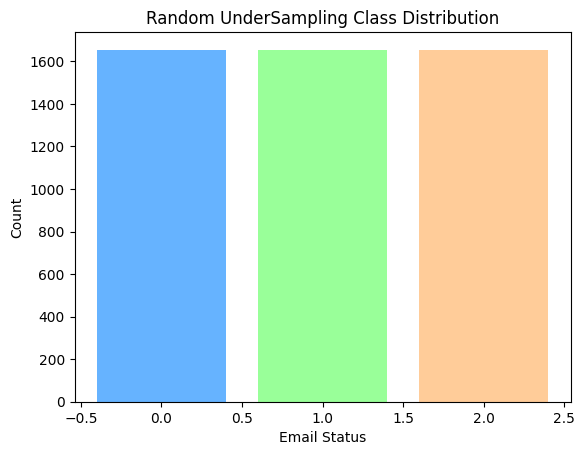


SMOTE Class Distribution:
Class=0, n=71724 (33.333%)
Class=1, n=71724 (33.333%)
Class=2, n=71724 (33.333%)


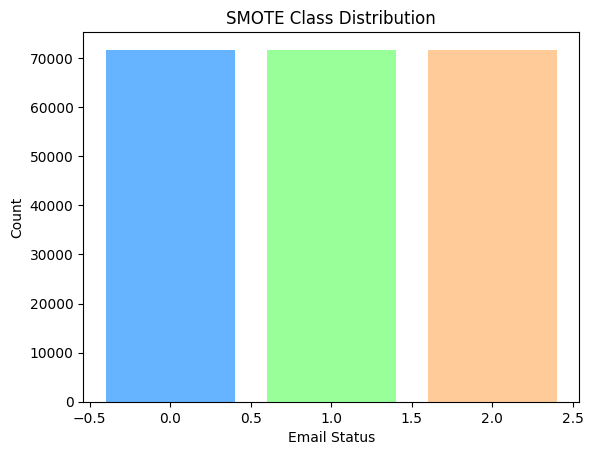

In [45]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming email_df_final is already defined and cleaned
X = email_df_final.drop(columns='email_status')
y = email_df_final['email_status']

# Train-test split with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# ----------------------------
# Random UnderSampling
# ----------------------------
rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# ----------------------------
# SMOTE OverSampling
# ----------------------------
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ----------------------------
# Visualization Helper Function
# ----------------------------
def resampled_data_visual(y_resampled, title):
    counter = Counter(y_resampled)
    for key, value in counter.items():
        per = value / len(y_resampled) * 100
        print(f'Class={key}, n={value} ({per:.3f}%)')
    plt.bar(counter.keys(), counter.values(), color=['#66b3ff','#99ff99','#ffcc99'])
    plt.title(title)
    plt.xlabel("Email Status")
    plt.ylabel("Count")
    plt.show()

# Output results
original_len = len(y_train)
rus_len = len(y_train_rus)
smote_len = len(y_train_smote)

# Display the original and resampled dataset sizes and their class distributions
print(f'Original dataset shape: {original_len}')
print(f'Resampled dataset shape (Random UnderSampling): {rus_len}')
print(f'Resampled dataset shape (SMOTE): {smote_len}')

print("\nRandom UnderSampling Class Distribution:")
resampled_data_visual(y_train_rus, "Random UnderSampling Class Distribution")

print("\nSMOTE Class Distribution:")
resampled_data_visual(y_train_smote, "SMOTE Class Distribution")


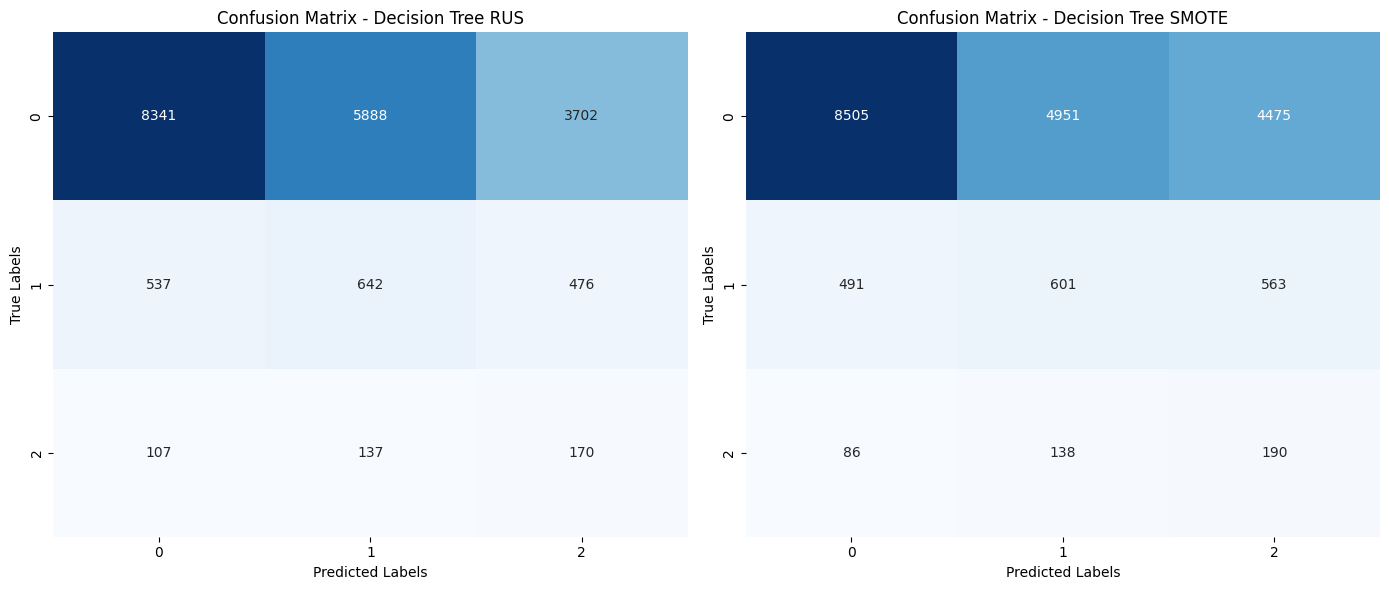


--- Decision Tree RUS Evaluation ---
Accuracy: 0.4577
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.47      0.62     17931
           1       0.10      0.39      0.15      1655
           2       0.04      0.41      0.07       414

    accuracy                           0.46     20000
   macro avg       0.35      0.42      0.28     20000
weighted avg       0.84      0.46      0.57     20000


--- Decision Tree SMOTE Evaluation ---
Accuracy: 0.4648
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.47      0.63     17931
           1       0.11      0.36      0.16      1655
           2       0.04      0.46      0.07       414

    accuracy                           0.46     20000
   macro avg       0.36      0.43      0.29     20000
weighted avg       0.85      0.46      0.58     20000


--- Final Evaluation Results ---

Decision Tree RUS Evaluation:
Accuracy: 0.457

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Function to evaluate the models and plot confusion matrix
def model_evaluation(model_name_1, model_name_2, model_1, model_2, X_train_1, y_train_1, X_train_2, y_train_2, X_test, y_test):
    eval_results = {}

    # Train and evaluate Random UnderSampling model
    model_1.fit(X_train_1, y_train_1)
    y_pred_1 = model_1.predict(X_test)

    # Train and evaluate SMOTE model
    model_2.fit(X_train_2, y_train_2)
    y_pred_2 = model_2.predict(X_test)

    # Accuracy and Classification Report for RUS model
    eval_results[model_name_1] = {
        "accuracy": accuracy_score(y_test, y_pred_1),
        "classification_report": classification_report(y_test, y_pred_1),
        "confusion_matrix": confusion_matrix(y_test, y_pred_1)
    }

    # Accuracy and Classification Report for SMOTE model
    eval_results[model_name_2] = {
        "accuracy": accuracy_score(y_test, y_pred_2),
        "classification_report": classification_report(y_test, y_pred_2),
        "confusion_matrix": confusion_matrix(y_test, y_pred_2)
    }

    # Plot confusion matrix for both models
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot confusion matrix for Random UnderSampling model
    sns.heatmap(eval_results[model_name_1]["confusion_matrix"], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {model_name_1}')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')

    # Plot confusion matrix for SMOTE model
    sns.heatmap(eval_results[model_name_2]["confusion_matrix"], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - {model_name_2}')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')

    plt.tight_layout()
    plt.show()

    # Print formatted classification reports and accuracy
    print(f"\n--- {model_name_1} Evaluation ---")
    print(f"Accuracy: {eval_results[model_name_1]['accuracy']:.4f}")
    print("Classification Report:")
    print(eval_results[model_name_1]['classification_report'])

    print(f"\n--- {model_name_2} Evaluation ---")
    print(f"Accuracy: {eval_results[model_name_2]['accuracy']:.4f}")
    print("Classification Report:")
    print(eval_results[model_name_2]['classification_report'])

    return eval_results


# Initialize the Decision Tree classifiers
dt_rus = DecisionTreeClassifier(random_state=42)
dt_smote = DecisionTreeClassifier(random_state=42)

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Get the evaluation results for both models
dt_eval_list = model_evaluation(
    'Decision Tree RUS',
    'Decision Tree SMOTE',
    dt_rus,
    dt_smote,
    x_train_rus,
    y_train_rus,
    x_train_smote,
    y_train_smote,
    X_test,
    y_test
)

# Print the evaluation results
print("\n--- Final Evaluation Results ---")
for model_name, metrics in dt_eval_list.items():
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report'])


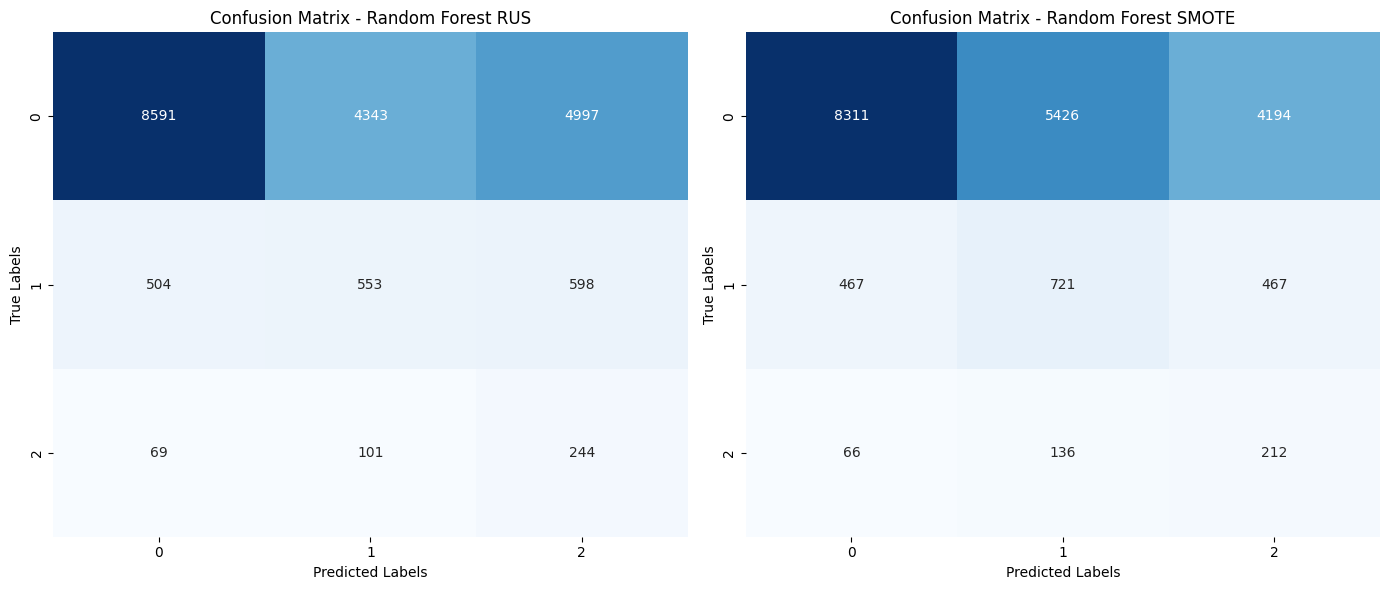


--- Random Forest RUS Evaluation ---
Accuracy: 0.4694
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.48      0.63     17931
           1       0.11      0.33      0.17      1655
           2       0.04      0.59      0.08       414

    accuracy                           0.47     20000
   macro avg       0.36      0.47      0.29     20000
weighted avg       0.85      0.47      0.58     20000


--- Random Forest SMOTE Evaluation ---
Accuracy: 0.4622
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.46      0.62     17931
           1       0.11      0.44      0.18      1655
           2       0.04      0.51      0.08       414

    accuracy                           0.46     20000
   macro avg       0.37      0.47      0.29     20000
weighted avg       0.85      0.46      0.57     20000


--- Random Forest Evaluation Results ---

Random Forest RUS Evaluation:
Accurac

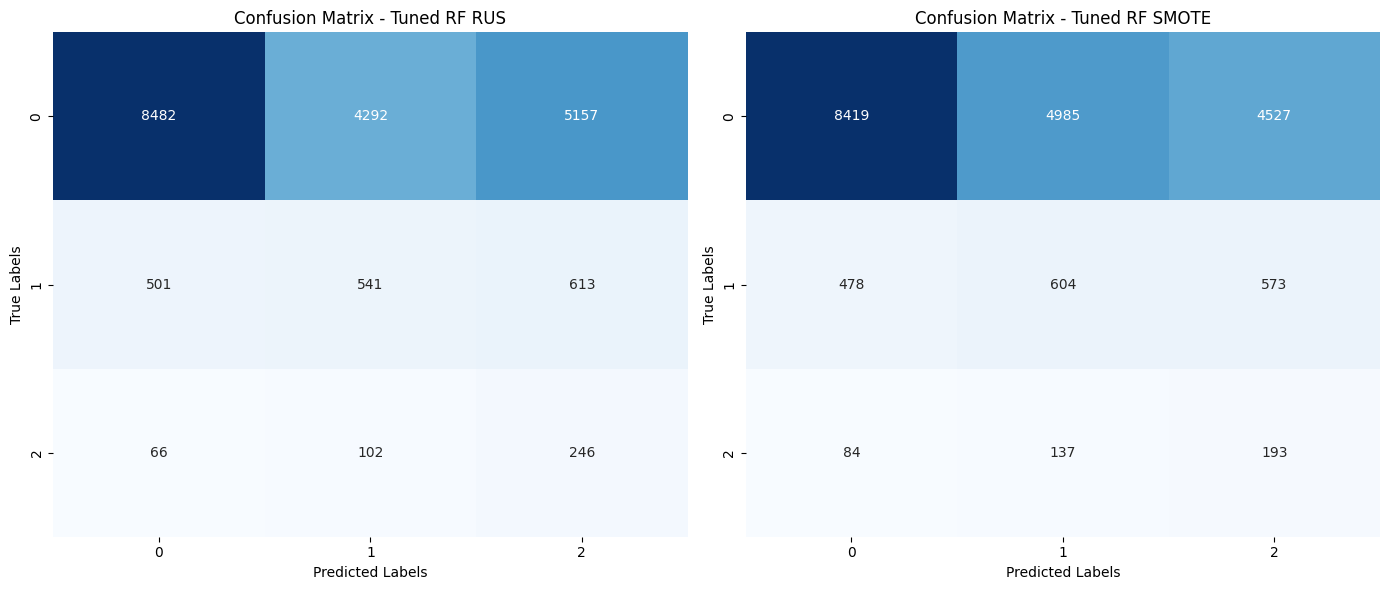


--- Tuned RF RUS Evaluation ---
Accuracy: 0.4634
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.47      0.63     17931
           1       0.11      0.33      0.16      1655
           2       0.04      0.59      0.08       414

    accuracy                           0.46     20000
   macro avg       0.36      0.46      0.29     20000
weighted avg       0.85      0.46      0.58     20000


--- Tuned RF SMOTE Evaluation ---
Accuracy: 0.4608
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.47      0.63     17931
           1       0.11      0.36      0.16      1655
           2       0.04      0.47      0.07       414

    accuracy                           0.46     20000
   macro avg       0.36      0.43      0.29     20000
weighted avg       0.85      0.46      0.58     20000


--- Tuned Random Forest Evaluation Results ---

Tuned RF RUS Evaluation:
Accuracy: 0.4634

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# ----------------------------
# 1. Base Random Forest Models (RUS and SMOTE)
# ----------------------------

# Initialize base models
rf_rus = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smote = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)

# Train and evaluate
rf_eval_list = model_evaluation(
    'Random Forest RUS',
    'Random Forest SMOTE',
    rf_rus,
    rf_smote,
    x_train_rus,
    y_train_rus,
    x_train_smote,
    y_train_smote,
    X_test,
    y_test
)

# Print evaluation results
print("\n--- Random Forest Evaluation Results ---")
for model_name, metrics in rf_eval_list.items():
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report'])

# ----------------------------
# 2. Hyperparameter Tuning
# ----------------------------

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

# Grid search for RUS
grid_search_rus = GridSearchCV(estimator=rf, param_grid=params, cv=4,
                               n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_rus.fit(x_train_rus, y_train_rus)
rf_tuned_rus = grid_search_rus.best_estimator_

# Grid search for SMOTE
grid_search_smote = GridSearchCV(estimator=rf, param_grid=params, cv=4,
                                 n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote.fit(x_train_smote, y_train_smote)
rf_tuned_smote = grid_search_smote.best_estimator_

# Evaluate tuned models
rf_tuned_eval = model_evaluation(
    'Tuned RF RUS',
    'Tuned RF SMOTE',
    rf_tuned_rus,
    rf_tuned_smote,
    x_train_rus,
    y_train_rus,
    x_train_smote,
    y_train_smote,
    X_test,
    y_test
)

# Print tuned evaluation results
print("\n--- Tuned Random Forest Evaluation Results ---")
for model_name, metrics in rf_tuned_eval.items():
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report'])

# ----------------------------
# 3. Feature Importance from Tuned RF SMOTE
# ----------------------------

import pandas as pd

feature_imp = pd.DataFrame({
    "Feature": x_train_smote.columns,
    "Importance": rf_tuned_smote.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n--- Feature Importances (Tuned RF SMOTE) ---")
print(feature_imp)


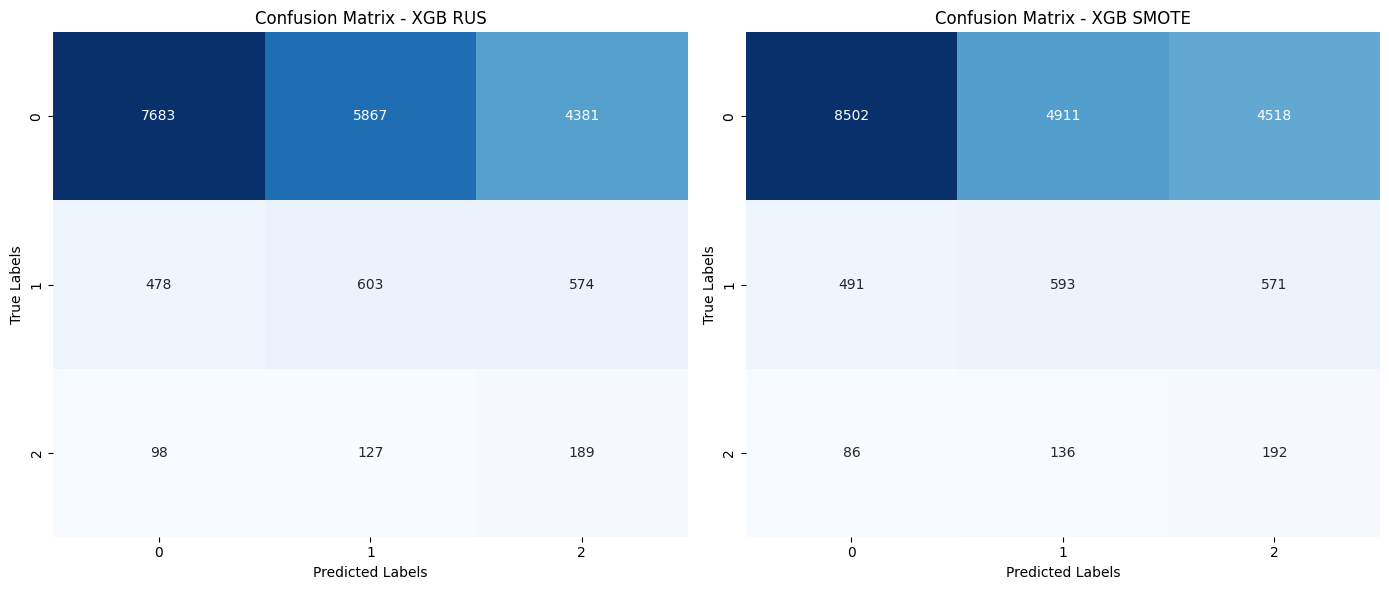


--- XGB RUS Evaluation ---
Accuracy: 0.4238
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.43      0.59     17931
           1       0.09      0.36      0.15      1655
           2       0.04      0.46      0.07       414

    accuracy                           0.42     20000
   macro avg       0.35      0.42      0.27     20000
weighted avg       0.84      0.42      0.54     20000


--- XGB SMOTE Evaluation ---
Accuracy: 0.4643
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.47      0.63     17931
           1       0.11      0.36      0.16      1655
           2       0.04      0.46      0.07       414

    accuracy                           0.46     20000
   macro avg       0.36      0.43      0.29     20000
weighted avg       0.85      0.46      0.58     20000



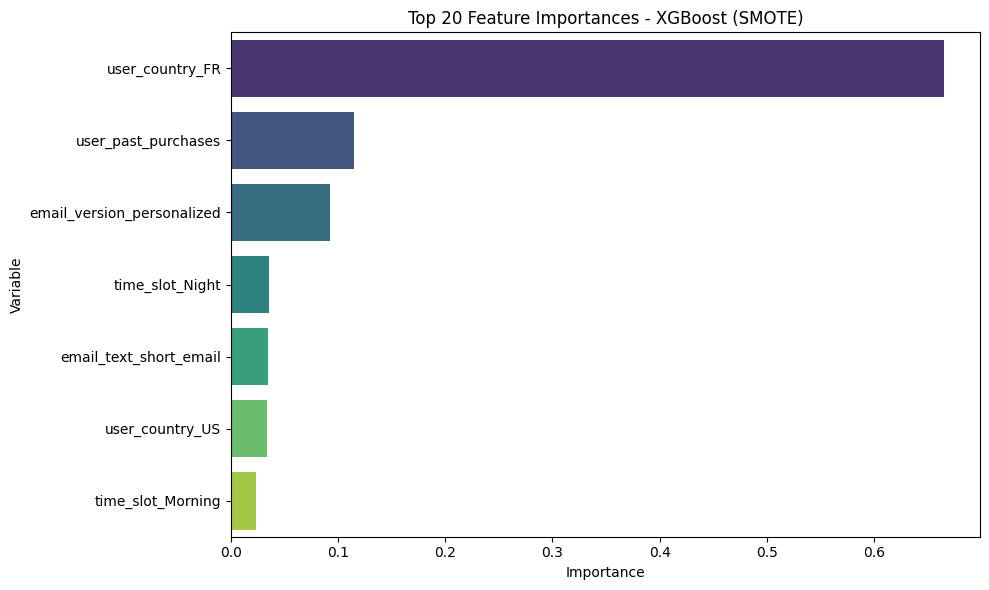

NameError: name 'add_list_to_final_df' is not defined

In [49]:
# Importing necessary libraries
from xgboost import XGBClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# 1. Fitting XGBoost Models (RUS and SMOTE)
# ----------------------------

xgb_rus = XGBClassifier(
    n_estimators=100,
    max_depth=12,
    learning_rate=0.1,
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_rus.fit(x_train_rus, y_train_rus)

xgb_smote = XGBClassifier(
    n_estimators=100,
    max_depth=12,
    learning_rate=0.1,
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_smote.fit(x_train_smote, y_train_smote)

# ----------------------------
# 2. Model Evaluation using Custom Function
# ----------------------------

xgb_eval_list = model_evaluation(
    'XGB RUS',
    'XGB SMOTE',
    xgb_rus,
    xgb_smote,
    x_train_rus,
    y_train_rus,
    x_train_smote,
    y_train_smote,
    X_test,
    y_test
)

# ----------------------------
# 3. Visualizing Feature Importance (for SMOTE model)
# ----------------------------

feature_imp_xgb = pd.DataFrame({
    "Variable": x_train_smote.columns,
    "Importance": xgb_smote.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Variable", data=feature_imp_xgb.head(20), palette='viridis')
plt.title("Top 20 Feature Importances - XGBoost (SMOTE)")
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Add to Final Comparison DataFrame
# ----------------------------

add_list_to_final_df(xgb_eval_list)

# ----------------------------
# 5. Display the Comparison DataFrame
# ----------------------------

print("\n--- Final Comparison DataFrame ---")
print(comparison_df)
